# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import os 
from tqdm import tqdm

In [2]:
#importing libraries
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from os import path
from pydub import AudioSegment

# Importing Data

In [3]:
df=pd.read_csv('list3.csv')

In [4]:
df

,Unnamed: 0,File,Language
0,0,3616.mp3,Bengali
1,1,3617.mp3,Bengali
2,2,3618.mp3,Bengali
3,3,3619.mp3,Bengali
4,4,3620.mp3,Bengali
...,...,...,...
495,45,5131.mp3,Telugu
496,46,5132.mp3,Telugu
497,47,5133.mp3,Telugu
498,48,5134.mp3,Telugu


# Testing methodology on Sample data

In [5]:
audio_file_path='test.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

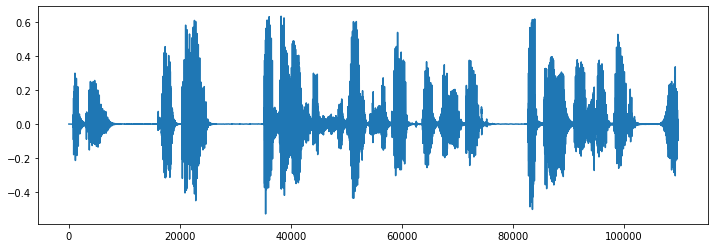

In [6]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 215)


In [8]:
mfccs

array([[-4.93756195e+02, -2.75908630e+02, -2.01776962e+02, ...,
        -2.55427841e+02, -2.19766464e+02, -1.89842117e+02],
       [ 6.84194641e+01,  1.24620834e+02,  1.21370369e+02, ...,
        -1.11930626e+02, -9.78366394e+01, -5.96406860e+01],
       [ 3.20141525e+01,  1.66067004e+00,  7.48561680e-01, ...,
         3.39507446e+01,  3.07250099e+01,  3.20520592e+01],
       ...,
       [-4.03516483e+00,  2.25100327e+00, -3.29170704e-01, ...,
         7.34832096e+00,  8.71939278e+00,  8.28682995e+00],
       [-2.09773803e+00, -7.75730419e+00, -8.34871960e+00, ...,
        -4.51309967e+00, -6.23722696e+00, -7.72232962e+00],
       [ 2.38927269e+00, -6.98992634e+00, -7.85903835e+00, ...,
        -2.97628880e-01, -1.30675411e+00, -2.43174791e-01]], dtype=float32)

# Feauture extraction

In [12]:
MFCC_NUM = 20
MFCC_MAX_LEN = 2000

In [6]:
def features_extractor(file,lang,max_len=2000):
    src = "./Data/Train/"+lang+"1/"+file
    dst = "./Data/test2.wav"
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    audio, sample_rate = librosa.load(dst, mono=True,sr=44100) 
    audio=audio[::3]
    mfcc = librosa.feature.mfcc(audio,sr=44100, n_mfcc=20)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    # Else cutoff the remaining parts
    
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

In [7]:
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_Name = str(row["File"])
    class_labels=row["Language"]
    data=features_extractor(file_Name,class_labels)
    extracted_features.append([data,class_labels])

0it [00:00, ?it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00463867 -0.00515747
 -0.00424194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
1it [00:00,  2.27it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.04739227 0.05367692 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
2it [00:00,  3.40it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02087402 -0.01062012
  0.0045166 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audi

24it [00:04,  4.84it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02401921 -0.02122935
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
25it [00:04,  4.77it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.07751465 0.08792114 0.09735107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
26it [00:04,  5.28it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00164789 -0.00197308
 -0.01032021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mf

48it [00:08,  5.30it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.00087166 0.00100329 0.00110008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
49it [00:08,  5.35it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1932225e-03 7.2123599e-04
 4.8419752e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
50it [00:08,  5.18it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00384521 -0.00689697
 -0.01287842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = libros

71it [00:11,  7.67it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00109863 -0.00787354
 -0.01507568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
72it [00:11,  7.87it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05349731  0.01708984
  0.12191772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
73it [00:12,  7.92it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00097656 -0.00585938
 -0.04550171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.fea

95it [00:15,  6.15it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01913452 -0.00701904
  0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
96it [00:15,  6.57it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.9717283e-06 1.6597750e-04
 3.2784257e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
97it [00:15,  6.04it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00135803 -0.00291443
  0.00526428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc =

119it [00:19,  5.92it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00271606 -0.00158691
  0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
120it [00:19,  6.08it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03359985 -0.03057861
 -0.01992798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
121it [00:20,  6.37it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21200562 -0.21170044
 -0.20132446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.

143it [00:24,  5.61it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1291504e-03
  6.1035156e-05  1.0681152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
144it [00:24,  6.29it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.00111707 0.00296443 0.0022109 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
145it [00:24,  5.78it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.0012207  0.00119019 0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = libr

167it [00:28,  5.33it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.02845859 0.07436306 0.06042536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
168it [00:28,  5.11it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 2.7866523e-05 -7.6276438e-06  3.3200497e-05 ...  6.4932802e-03
  1.0259817e-02  3.1529311e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
169it [00:29,  5.23it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[-2.9592498e-05 -2.9675713e-05 -2.9943178e-05 ... -7.0563205e-02
 -6.4572021e-02 -1.9041160e-02] as keyword args. From version 0.10 passing these as positional arguments will result 

191it [00:33,  4.70it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02731067 -0.01785005
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
192it [00:33,  4.55it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02676263 -0.01916852
 -0.01073983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
193it [00:34,  4.52it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00598591 -0.00413081
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.

215it [00:37,  6.48it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.06769404 0.09107948 0.09632917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
216it [00:38,  5.69it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04232788 -0.04415894
 -0.03860474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
217it [00:38,  6.02it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03297424 -0.02915955
 -0.02018738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature

239it [00:43,  4.89it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00091553 -0.00085449
  0.00085449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
240it [00:43,  5.48it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.00216675 0.00219727 0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
241it [00:43,  5.90it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03811646 -0.03527832
 -0.03433228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature

263it [00:48,  4.23it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0165863  -0.02549744
 -0.03398132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
264it [00:48,  4.67it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.02159119 0.0269165  0.01805115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
265it [00:48,  4.97it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.17304026 0.19565198 0.244222  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(a

287it [00:54,  4.38it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.06629193 0.05181203 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
288it [00:54,  4.13it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01742538 -0.00866366
 -0.01718462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
289it [00:54,  3.96it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0685174  -0.00137275
  0.02949702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature

311it [00:59,  6.13it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.50805664 0.45181274 0.3635254 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
312it [00:59,  6.19it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.17514038 0.16400146 0.14855957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
313it [00:59,  6.47it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00054932 -0.00100708
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(a

335it [01:03,  6.47it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08369213 -0.06164594
 -0.0298813 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
336it [01:03,  5.48it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.02780151 -0.0173645
 -0.04547119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
337it [01:04,  5.58it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06160758 -0.04119021
 -0.01247254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.f

359it [01:09,  4.04it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.10307027 0.16153967 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
360it [01:09,  4.06it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.0001326  0.00026719 0.00033058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
361it [01:09,  4.18it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00423443 -0.02266663
 -0.04917618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(a

383it [01:15,  3.74it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[-0.00491705 -0.00485095 -0.00441746 ...  0.00161256  0.00916696
  0.00378057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
384it [01:16,  3.73it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04815173 -0.05820212
 -0.06449123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
385it [01:16,  3.42it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.3276551  0.38159811 0.30731568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature

407it [01:21,  4.43it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.10293579 0.08996582 0.06896973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
408it [01:21,  4.77it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.00820923 0.00778198 0.00772095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
409it [01:22,  5.09it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.2015686  0.20211792 0.20513916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, s

432it [01:27,  5.59it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00106175 -0.00086719
 -0.00070027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
433it [01:27,  5.13it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.0274353  0.01876831 0.01473999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
434it [01:27,  5.42it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00830078 -0.00933838
 -0.01055908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature

456it [01:32,  3.74it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4485445e-07
 -4.4977410e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
457it [01:33,  3.41it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.12575164 0.11481411 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
458it [01:33,  3.28it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2242481e-08
  1.2425682e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result 

481it [01:39,  3.86it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.00216675 0.00204468 0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
482it [01:39,  4.20it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5094938e-05 2.5716756e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
483it [01:39,  4.03it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_13132\1277726512.py:8: FutureWarning: Pass y=[0.         0.         0.         ... 0.02215576 0.02435303 0.02310181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.fe

In [8]:
extracted_features[:3]

[[array([[-5.4279535e+02, -4.6983127e+02, -4.3614166e+02, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 7.6409988e+01,  1.2693317e+02,  1.3303015e+02, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 4.8477341e+01,  3.6677631e+01,  1.8324318e+01, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 1.3275488e-01,  2.2857885e+00,  2.3041935e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [-1.6551445e+00,  6.5288019e+00,  5.4619060e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [-6.5795794e+00, -7.9772930e+00, -3.0554142e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
  'Bengali'],
 [array([[-164.3808   , -142.78333  , -130.60242  , ...,    0.       ,
             0.       ,    0.       ],
         [ 178.1733   ,  169.21042  ,  113.3556   , ...,    0.       ,
             0.       ,    0.       ],
   

In [9]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['Vectors','Lang'])
extracted_features_df.head(5)

,Vectors,Lang
0,"[[-542.79535, -469.83127, -436.14166, -436.985...",Bengali
1,"[[-164.3808, -142.78333, -130.60242, -92.38539...",Bengali
2,"[[-592.3005, -505.1313, -445.61926, -441.69305...",Bengali
3,"[[-398.0643, -324.6615, -297.86838, -302.87558...",Bengali
4,"[[-620.00073, -579.49, -572.0771, -593.76373, ...",Bengali


In [10]:
extracted_features_df.to_csv('extract.csv')

In [10]:
shuffled = extracted_features_df.sample(frac=1)
print(shuffled)

                                               Vectors      Lang
436  [[-471.34164, -349.23404, -297.63803, -304.001...   Marathi
323  [[-251.93901, -140.19096, -73.53595, -75.08736...     Tamil
188  [[-368.28723, -284.0032, -261.3718, -272.75482...   Kannada
215  [[-521.3048, -313.29306, -226.6426, -210.71407...   Punjabi
389  [[-479.66412, -471.16513, -508.30917, -541.546...  Malyalam
..                                                 ...       ...
288  [[-413.46265, -252.08275, -195.81564, -200.180...      Urdu
395  [[-359.73334, -278.65735, -292.38916, -330.051...  Malyalam
398  [[-365.2497, -258.56134, -234.57382, -279.2669...  Malyalam
102  [[-650.94037, -346.60486, -231.43558, -243.388...     Hindi
308  [[-540.7505, -455.01996, -350.47797, -218.4178...     Tamil

[500 rows x 2 columns]


In [11]:
#split into independent and dependent variables
X=np.array(shuffled['Vectors'].tolist())
y=np.array(shuffled['Lang'].tolist())

In [12]:
X.dtype

dtype('float32')

In [15]:
#Label encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Train test split

In [3]:
import tensorflow
import keras
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
X_train.shape

(320, 20, 2000)

# Reshaping data

In [19]:
feature_dim_1 = MFCC_NUM
feature_dim_2 = MFCC_MAX_LEN
channel = 1
epochs = 70
batch_size = 100
verbose = 1
num_classes = 10

In [20]:
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)


In [21]:
X_train.shape

(320, 20, 2000, 1)

# Building Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

In [22]:
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 1999, 32)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 1998, 48)      6192      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 999, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 999, 48)        0         
                                                                 
 flatten (Flatten)           (None, 431568)            0         
                                                                 
 dense (Dense)               (None, 128)               55240832  
                                                        

# Model compiling and fitting

In [24]:
optimizer = optimizers.SGD(learning_rate=0.002, decay=1e-6, momentum=0.9, nesterov=True)
    

In [24]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test))

Epoch 1/70
4/4 [==============================] - 21s 4s/step - loss: 1.2840 - accuracy: 0.6781 - val_loss: 6.8173 - val_accuracy: 0.3200
Epoch 2/70
4/4 [==============================] - 16s 4s/step - loss: 2.8810 - accuracy: 0.5469 - val_loss: 0.8772 - val_accuracy: 0.6800
Epoch 3/70
4/4 [==============================] - 16s 4s/step - loss: 0.8853 - accuracy: 0.7594 - val_loss: 0.6050 - val_accuracy: 0.8000
Epoch 4/70
4/4 [==============================] - 15s 3s/step - loss: 0.7958 - accuracy: 0.7812 - val_loss: 0.7384 - val_accuracy: 0.7500
Epoch 5/70
4/4 [==============================] - 14s 3s/step - loss: 0.5707 - accuracy: 0.8094 - val_loss: 0.6267 - val_accuracy: 0.8400
Epoch 6/70
4/4 [==============================] - 14s 3s/step - loss: 0.4189 - accuracy: 0.8438 - val_loss: 0.6961 - val_accuracy: 0.7800
Epoch 7/70
4/4 [==============================] - 14s 3s/step - loss: 0.5532 - accuracy: 0.8531 - val_loss: 0.6889 - val_accuracy: 0.8500
Epoch 8/70
4/4 [==================

4/4 [==============================] - 16s 4s/step - loss: 0.0651 - accuracy: 0.9719 - val_loss: 1.5591 - val_accuracy: 0.7800
Epoch 61/70
4/4 [==============================] - 17s 4s/step - loss: 0.0608 - accuracy: 0.9844 - val_loss: 0.8908 - val_accuracy: 0.8400
Epoch 62/70
4/4 [==============================] - 16s 4s/step - loss: 0.0443 - accuracy: 0.9844 - val_loss: 0.9959 - val_accuracy: 0.8500
Epoch 63/70
4/4 [==============================] - 16s 4s/step - loss: 0.1788 - accuracy: 0.9406 - val_loss: 1.3792 - val_accuracy: 0.7900
Epoch 64/70
4/4 [==============================] - 16s 4s/step - loss: 0.0538 - accuracy: 0.9750 - val_loss: 0.8529 - val_accuracy: 0.8500
Epoch 65/70
4/4 [==============================] - 15s 4s/step - loss: 0.0568 - accuracy: 0.9750 - val_loss: 0.8709 - val_accuracy: 0.8500
Epoch 66/70
4/4 [==============================] - 15s 4s/step - loss: 0.0701 - accuracy: 0.9844 - val_loss: 0.8199 - val_accuracy: 0.8400
Epoch 67/70
4/4 [======================

In [24]:
X_validation = X_validation.reshape(X_validation.shape[0], feature_dim_1, feature_dim_2, channel)


In [31]:
model.predict(X_validation)[2]

3/3 [==============================] - 1s 165ms/step


array([4.2701644e-21, 9.1377575e-07, 2.1809555e-19, 3.4118143e-23,
       7.7388931e-25, 1.4862775e-13, 9.9999905e-01, 6.7536206e-23,
       4.9865115e-18, 2.6955377e-14], dtype=float32)

In [32]:
y_validation[2]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Saving model

In [5]:
from tensorflow.keras.models import load_model

In [39]:
model1.save('./Model/langCnn1.hdf5')

In [6]:
model=tensorflow.keras.models.load_model('./Model/langCnn1.hdf5')

In [7]:
def features_extractors(file,max_len=2000):
    src = file
    dst = "./Data/test2.wav"
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    audio, sample_rate = librosa.load(dst, mono=True,sr=44100) 
    audio=audio[::3]
    mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

## CLASSIFICATION OF A SINGLE TEST AUDIO

In [18]:
m=features_extractors('WhatsApp Audio 2022-11-04 at 10.37.02.mp3')

C:\Users\admin\AppData\Local\Temp\ipykernel_18184\1272114225.py:8: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00260845  0.00093361
 -0.00213003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=44100, n_mfcc=20)


In [19]:
k=[]
k.append([m])

In [20]:
extracted_features_d=pd.DataFrame(k,columns=['Vectors'])
extracted_features_d

,Vectors
0,"[[-600.1295, -600.1295, -600.1295, -426.6875, ..."


In [21]:
feature_dim_1 = MFCC_NUM
# Second dimension of the feature is dim2
feature_dim_2 = MFCC_MAX_LEN
channel = 1
epochs = 70
batch_size = 100
verbose = 1

In [22]:
X=np.array(extracted_features_d['Vectors'].tolist())
#y=np.array(extracted_features_d['Lang'].tolist())

In [23]:
X.shape

(1, 20, 2000)

In [24]:
X = X.reshape(X.shape[0], feature_dim_1, feature_dim_2, channel)


In [25]:
model.predict(X)[0]

1/1 [==============================] - 0s 112ms/step


array([2.9009872e-04, 2.5161630e-06, 1.5237135e-13, 3.3940098e-05,
       1.5325308e-01, 5.2274018e-08, 4.7504858e-09, 1.4111033e-01,
       7.0530981e-01, 1.7496690e-07], dtype=float32)